# Projeto em Análise de Dados

### Importando as bibliotecas necessárias para o projeto

In [348]:
import os #percorrer (ler) arquivos, dowload e upload de arquivos
import os.path #percorrer (ler) arquivos, dowload e upload de arquivos
import pandas as pd #utilizar os DataFrames e facilidade de trabalho com muitos dados
from datetime import datetime #tratamento de dados para datas
from datetime import timedelta #tratamento de dados para datas
import matplotlib.pyplot as plt #plot dos gráficos
import statsmodels.api as sm #regressão linear
import numpy as np #import desta biblioteca no projeto é para utilização do stasmodel para regressão linear

### 1) Tratamento de Dados - ETL e Criação de Camadas para Backup

#### A parte **"E" (extract)** do ETL já foi feita de antemão, uma vez que os dados do drive com as planilhas mockadas foram baixados e transferidos para este diretório. Os próximos passos são: Fazer a leitura dos dados e **transformação** dos mesmos, para posteriormente fazermos o **LOAD** em um DataFrame do Pandas e em arquivos .csv.

##### A Etapa Load compreende também em guardar os dados em .csv em camadas - Usar um conceito aqui de Data Engineering que é salvar os dados em 3 camadas (bronze, silver e gold).
##### A diferença entre as camadas está no tratamento dos dados e nas colunas.
##### Quanto mais perto da etapa, mais a camada está apta para ser usada na análise e visualização dos dados (DataViz) - Só a partir da etapa Gold é que podemos iniciar a análise em si dos dados.
##### Fazemos esse tipo de Backup geralmente em banco de dados via Schema, onde pode acontecer de existir algum erro na etapa seguinte de tratamento e assim podemos recuperar os dados mais "brutos" nas etapas anteriores.
##### Exemplo: Se der algum erro na camada Gold com os dados, podemos obter os dados novamente acessando a camada Silver... E assim por diante.

In [349]:
## Inicializo o DataFrame principal em Pandas:

df = pd.DataFrame()
dfs = [] # Vetor fora do Pandas para receber appends


caminho = 'Tabelas/'
lista_arquivos = os.listdir(caminho)

# 'For' para varrer toda a pasta de planilhas mockadas:
for arquivo in lista_arquivos:
    df_aux = pd.read_csv(caminho+str(arquivo))
    dfs.append(df_aux)

df = pd.concat(dfs, ignore_index=True) # Concatenação de dataframes

df.to_csv('backup/camada_bronze.csv') # transformar Arquivo em .csv para camada Bronze (conceito de Data Engeneering) - Para usar de Backup

df

,ano,uf,genero,mes,numero
0,2019,Rondônia,Masculino,Janeiro,0
1,2019,Rondônia,Masculino,Fevereiro,4
2,2019,Rondônia,Masculino,Março,1
3,2019,Rondônia,Masculino,Abril,0
4,2019,Rondônia,Masculino,Maio,0
...,...,...,...,...,...
4531,2021,Distrito Federal,Feminino,Agosto,12
4532,2021,Distrito Federal,Feminino,Setembro,13
4533,2021,Distrito Federal,Feminino,Outubro,15
4534,2021,Distrito Federal,Feminino,Novembro,20


#### Agora que temos um DataFrame único, podemos fazer o tratamento de dados, pois alguns campos (colunas) ainda estão com o type de 'object'

In [350]:
df.dtypes

ano        int64
uf        object
genero    object
mes       object
numero     int64
dtype: object

#### Não é pertinente deixar duas colunas de data (como por exemplo, ano e mês) separadas, sendo assim podemos juntá-las em uma única e transformar os dados em Date Time

In [351]:
#Criação de um dicionário para mapear os meses e transformá-los em números.

dicionario_mes = {
    'Janeiro': '01',
    'Fevereiro': '02',
    'Março': '03',
    'Abril': '04',
    'Maio': '05',
    'Junho': '06',
    'Julho': '07',
    'Agosto': '08',
    'Setembro': '09',
    'Outubro': '10',
    'Novembro': '11',
    'Dezembro': '12'
}

In [352]:
#Criação da coluna de numero_mes que corresponde ao número do respectvo mês do dicionário acima.
#Utilizei o método map que maepeia os valores do dicionário
df['numero_mes'] = df['mes'].map(dicionario_mes)
df

,ano,uf,genero,mes,numero,numero_mes
0,2019,Rondônia,Masculino,Janeiro,0,01
1,2019,Rondônia,Masculino,Fevereiro,4,02
2,2019,Rondônia,Masculino,Março,1,03
3,2019,Rondônia,Masculino,Abril,0,04
4,2019,Rondônia,Masculino,Maio,0,05
...,...,...,...,...,...,...
4531,2021,Distrito Federal,Feminino,Agosto,12,08
4532,2021,Distrito Federal,Feminino,Setembro,13,09
4533,2021,Distrito Federal,Feminino,Outubro,15,10
4534,2021,Distrito Federal,Feminino,Novembro,20,11


In [353]:
df.dtypes

ano            int64
uf            object
genero        object
mes           object
numero         int64
numero_mes    object
dtype: object

In [354]:
df['ano'] = df['ano'].astype(str) # Transformar o Ano em string, pois ainda está em int
df['numero_mes'] = df['numero_mes'].astype(str) # Transformar o Ano em string, pois ainda está em object
df['data'] = pd.to_datetime(df['ano'] + '-' + df['numero_mes'] + '-01') # Como o dia do mês não importa na análise, podemos omitir esse campo
# Por default, as datas ficarão no formato aaaa-mm-dd, o campo de dia '-dd' ficará sempre '01'

In [355]:
# Verificar se há valores nulos no DataFrame e 'Dropá-los', pois se há algum valor nulo, não devemos considerá-los na análise:
df = df.dropna()
df


,ano,uf,genero,mes,numero,numero_mes,data
0,2019,Rondônia,Masculino,Janeiro,0,01,2019-01-01
1,2019,Rondônia,Masculino,Fevereiro,4,02,2019-02-01
2,2019,Rondônia,Masculino,Março,1,03,2019-03-01
3,2019,Rondônia,Masculino,Abril,0,04,2019-04-01
4,2019,Rondônia,Masculino,Maio,0,05,2019-05-01
...,...,...,...,...,...,...,...
4531,2021,Distrito Federal,Feminino,Agosto,12,08,2021-08-01
4532,2021,Distrito Federal,Feminino,Setembro,13,09,2021-09-01
4533,2021,Distrito Federal,Feminino,Outubro,15,10,2021-10-01
4534,2021,Distrito Federal,Feminino,Novembro,20,11,2021-11-01


In [356]:
# Foi verificado acima que não há valores nulos nas linhas, pois o DataFrame continua com a mesma quantidade de linhas que anteriormente
# Portanto podemos seguir pra a etapa Silver de tratamento de Dados. 
df.to_csv('backup/camada_silver.csv') # transformar Arquivo em .csv para camada Silver (conceito de Data Engeneering) - Para usar de Backup - Dados mais tratados em Silver (tipagem correta).

#### Agora podemos 'Dropar' as colunas 'numero_mes', 'mes' e 'ano' para fins de performance, mas podemos manter as mesmas colunas caso sejam pertinentes na análise (neste caso irei manter as colunas 'mes' e 'ano'). Manterei desta forma, pois os dados já estão 'Safrados' (conceito em DE de agrupamento de data, por exemplo).

#### Neste caso irei dropar apenas a coluna de 'numero_mes', pois a coluna de data já possui toda a informação pertinente.

In [357]:
#Neste passo farei a parte de estabelecer relações entre Estados e suas respectivas regiões, isso para a camada Gold.
df = df.drop(columns='numero_mes') #Tirar a coluna de numero_mes

#Segue o dicionário que relacona os Estados com suas respectivas Regiões do BR:
uf_regioes = {
    'Acre': 'Norte',
    'Alagoas': 'Nordeste',
    'Amapá': 'Norte',
    'Amazonas': 'Norte',
    'Bahia': 'Nordeste',
    'Ceará': 'Nordeste',
    'Distrito Federal': 'Centro-Oeste',
    'Espírito Santo': 'Sudeste',
    'Goiás': 'Centro-Oeste',
    'Maranhão': 'Nordeste',
    'Mato Grosso': 'Centro-Oeste',
    'Mato Grosso do Sul': 'Centro-Oeste',
    'Minas Gerais': 'Sudeste',
    'Pará': 'Norte',
    'Paraíba': 'Nordeste',
    'Paraná': 'Sul',
    'Pernambuco': 'Nordeste',
    'Piauí': 'Nordeste',
    'Rio de Janeiro': 'Sudeste',
    'Rio Grande do Norte': 'Nordeste',
    'Rio Grande do Sul': 'Sul',
    'Rondônia': 'Norte',
    'Roraima': 'Norte',
    'Santa Catarina': 'Sul',
    'São Paulo': 'Sudeste',
    'Sergipe': 'Nordeste',
    'Tocantins': 'Norte'
}

df['regiao'] = df['uf'].map(uf_regioes) #Mapear as regiões dentro do DataFrame
# Colocar a data númerica (dias corridos):
df['data_numerica'] = (df['data'] - df['data'].min()).dt.days # Variação de dias corridos para ter um "x" de mais fácl entendimento e visbilidade - Para a biblioteca statsmodel
# A biblioteca stasmodel não aceita a data no formato Datetime, por isso é pertinente criar mais esta coluna acima.

df.to_csv('backup/camada_gold.csv') #Criação da Camada Gold (última camada e configuração ideal para a análise de dados)
df

,ano,uf,genero,mes,numero,data,regiao,data_numerica
0,2019,Rondônia,Masculino,Janeiro,0,2019-01-01,Norte,1461
1,2019,Rondônia,Masculino,Fevereiro,4,2019-02-01,Norte,1492
2,2019,Rondônia,Masculino,Março,1,2019-03-01,Norte,1520
3,2019,Rondônia,Masculino,Abril,0,2019-04-01,Norte,1551
4,2019,Rondônia,Masculino,Maio,0,2019-05-01,Norte,1581
...,...,...,...,...,...,...,...,...
4531,2021,Distrito Federal,Feminino,Agosto,12,2021-08-01,Centro-Oeste,2404
4532,2021,Distrito Federal,Feminino,Setembro,13,2021-09-01,Centro-Oeste,2435
4533,2021,Distrito Federal,Feminino,Outubro,15,2021-10-01,Centro-Oeste,2465
4534,2021,Distrito Federal,Feminino,Novembro,20,2021-11-01,Centro-Oeste,2496


In [358]:
df.dtypes

ano                      object
uf                       object
genero                   object
mes                      object
numero                    int64
data             datetime64[ns]
regiao                   object
data_numerica             int64
dtype: object

#### Sendo assim, o Tratamento de Dados está concluído!

#### ETL - Feito!

#### Criação de Camadas para Backup (Bronze, Silver e Gold) - Feito!

### 2) Análise dos Dados tratados - Insights Iniciais

#### Plot inicial: Data x Casamentos Homoafetivos

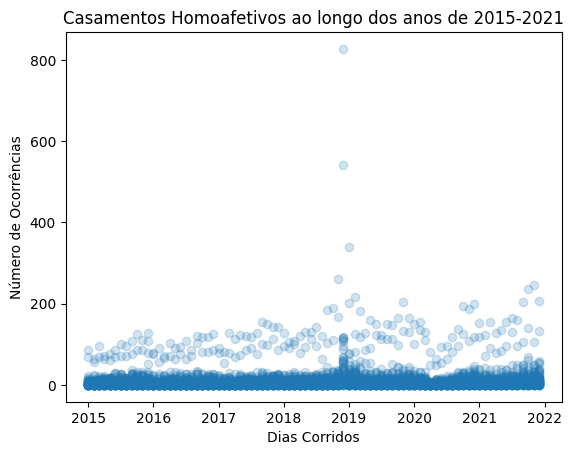

In [359]:
# Verificar um plot inicial de série temporal:
plt.scatter(df['data'], df['numero'], alpha=0.2)
plt.xlabel('Dias Corridos')
plt.ylabel('Número de Ocorrências')
plt.title('Casamentos Homoafetivos ao longo dos anos de 2015-2021')
plt.show()

##### Como os dados da série temporal de Data x Número de Casamentos estão visualmente poluídos, devemos segmentar e 'safrar' os dados para termos uma clareza melhor do problema

#### Histogramas:

##### Abaixo seguem os plots de Histogramas e seus respectivos DataFrame de cohorts - Mostro os plots e os dados tabelados para uma possível consulta

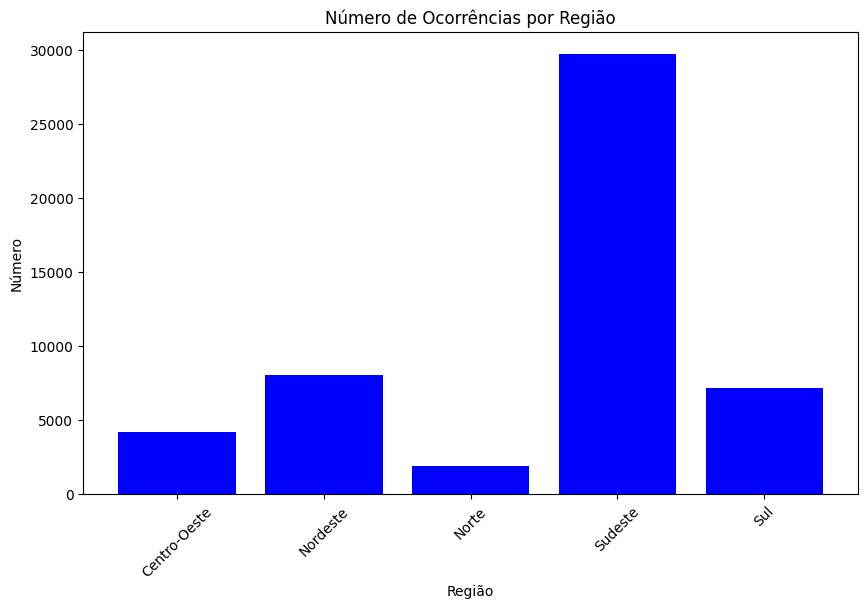

In [360]:
# Agrupar por região, somar os números e resetar o index
df_regiao = df.groupby('regiao')['numero'].sum().reset_index()

# Plot do histograma:
plt.figure(figsize=(10, 6))
plt.bar(df_regiao['regiao'], df_regiao['numero'], color='blue')
plt.xlabel('Região')
plt.ylabel('Número')
plt.title('Número de Ocorrências por Região')
plt.xticks(rotation=45)
plt.show()

In [361]:
df_regiao

,regiao,numero
0,Centro-Oeste,4192
1,Nordeste,8070
2,Norte,1898
3,Sudeste,29714
4,Sul,7192


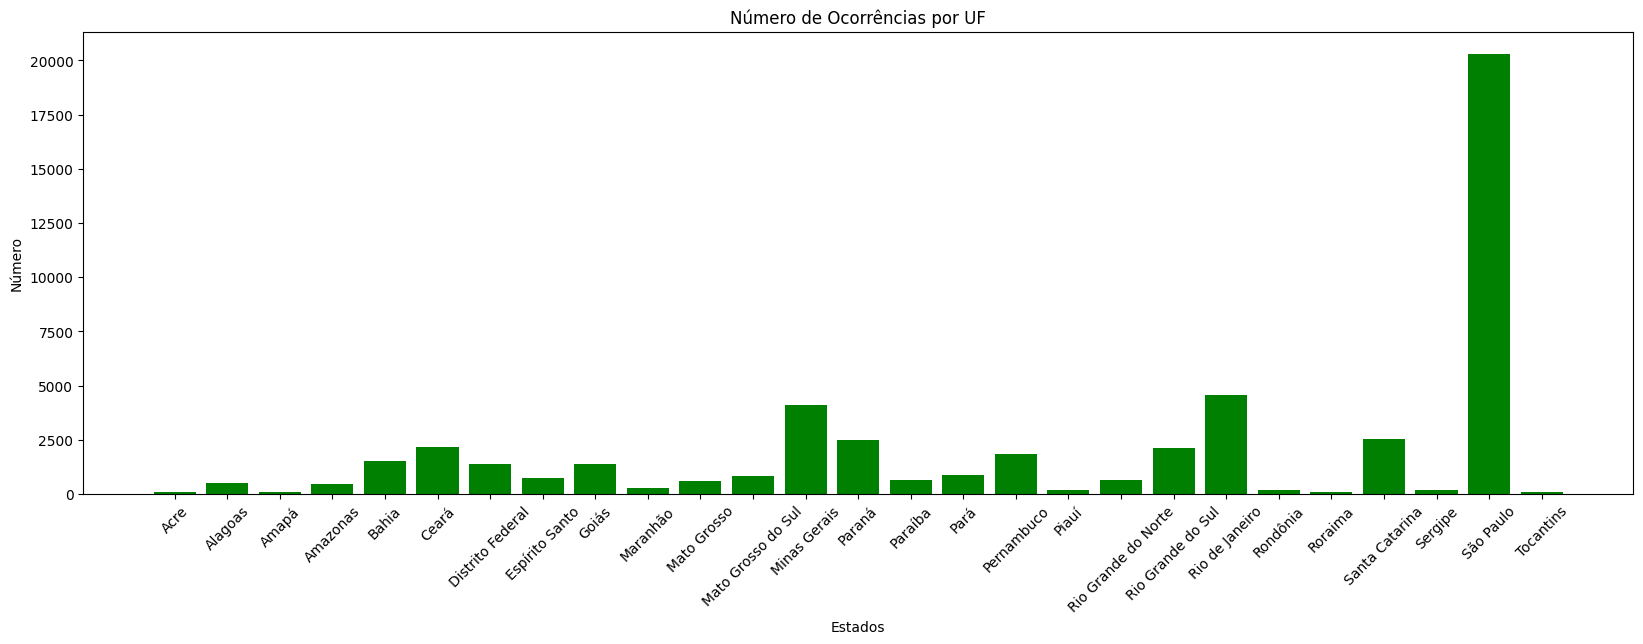

In [362]:
# Agrupar por uf, somar os números e resetar o index
df_uf = df.groupby('uf')['numero'].sum().reset_index()

# Plot do histograma:
plt.figure(figsize=(20, 6)) #Ajuste de 20 x 6 para alongar o gráfico na horizontal
plt.bar(df_uf['uf'], df_uf['numero'], color='green')
plt.xlabel('Estados')
plt.ylabel('Número')
plt.title('Número de Ocorrências por UF')
plt.xticks(rotation=45)
plt.show()

In [363]:
df_uf

,uf,numero
0,Acre,81
1,Alagoas,512
2,Amapá,81
3,Amazonas,454
4,Bahia,1531
5,Ceará,2166
6,Distrito Federal,1378
7,Espírito Santo,758
8,Goiás,1367
9,Maranhão,306


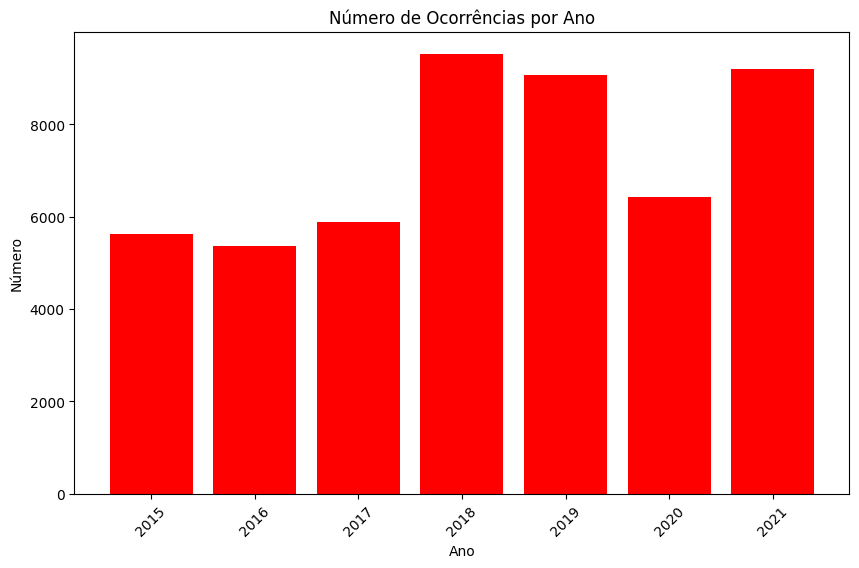

In [364]:
# Agrupar por ano, somar os números e resetar o index
df_ano = df.groupby('ano')['numero'].sum().reset_index()

# Plot do histograma:
plt.figure(figsize=(10, 6))
plt.bar(df_ano['ano'], df_ano['numero'], color='red')
plt.xlabel('Ano')
plt.ylabel('Número')
plt.title('Número de Ocorrências por Ano')
plt.xticks(rotation=45)
plt.show()

In [365]:
df_ano

,ano,numero
0,2015,5614
1,2016,5354
2,2017,5887
3,2018,9520
4,2019,9056
5,2020,6433
6,2021,9202


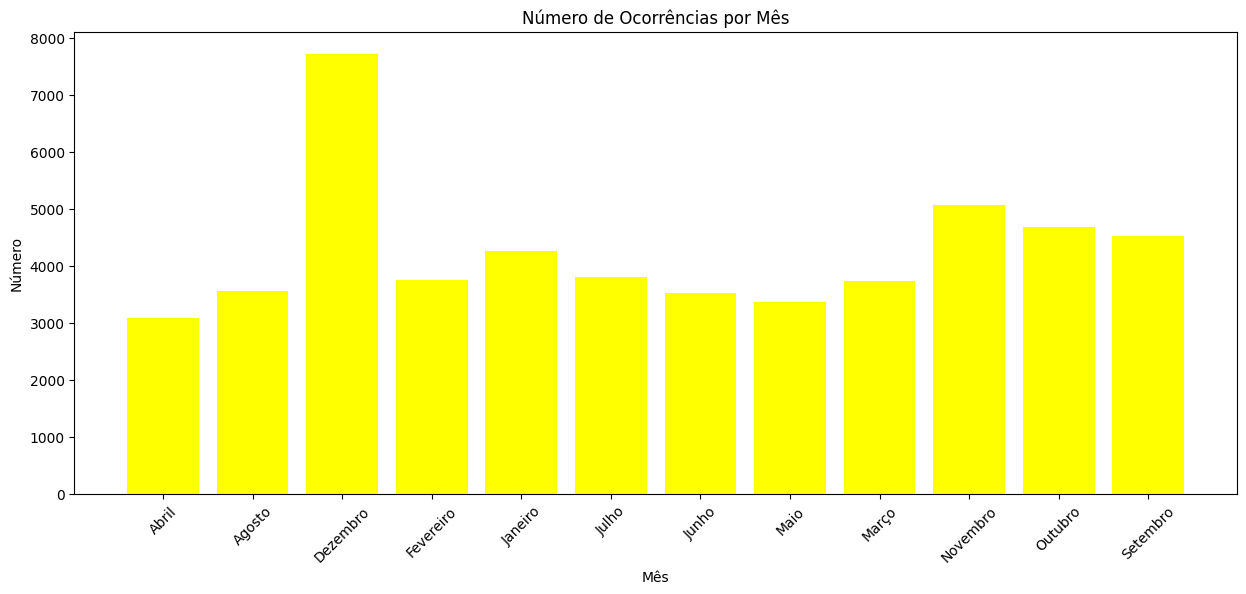

In [366]:
# Agrupar por mês, somar os números e resetar o index
df_mes = df.groupby('mes')['numero'].sum().reset_index()

# Plot do histograma:
plt.figure(figsize=(15, 6))
plt.bar(df_mes['mes'], df_mes['numero'], color='yellow')
plt.xlabel('Mês')
plt.ylabel('Número')
plt.title('Número de Ocorrências por Mês')
plt.xticks(rotation=45)
plt.show()

In [367]:
df_mes

,mes,numero
0,Abril,3077
1,Agosto,3566
2,Dezembro,7716
3,Fevereiro,3753
4,Janeiro,4252
5,Julho,3806
6,Junho,3519
7,Maio,3371
8,Março,3727
9,Novembro,5062


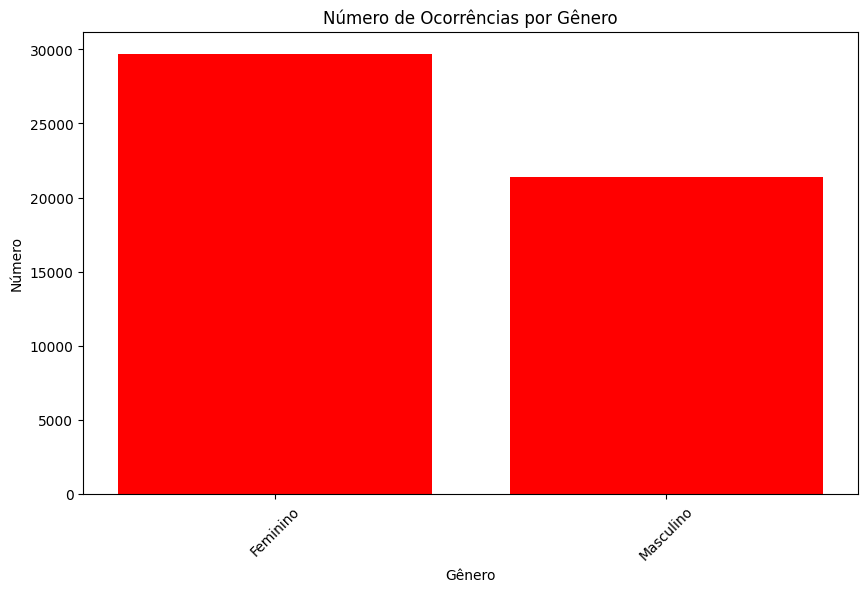

In [368]:
# Agrupar por genero, somar os números e resetar o index
df_gen = df.groupby('genero')['numero'].sum().reset_index()

# Plot do histograma:
plt.figure(figsize=(10, 6))
plt.bar(df_gen['genero'], df_gen['numero'], color='red')
plt.xlabel('Gênero')
plt.ylabel('Número')
plt.title('Número de Ocorrências por Gênero')
plt.xticks(rotation=45)
plt.show()

In [369]:
df_gen

,genero,numero
0,Feminino,29693
1,Masculino,21373


### 3) - Explorando o problema do Cliente com Análise de Dados

#### *Queremos entender quais insights conseguimos tirar dessa base, e também qual a previsão de casamentos homoafetivos para os próximos 2 anos nos 3 estados com maior número de casamentos no último ano. Seria possível realizar essa análise?*

##### 1. Para isto, devemos fazer os filtros pertinentes e achar os 3 Estados com maior número de casamentos no último ano;
##### 2. Após acharmos os Estados, devemos fazer um tratamento de dados para retirar os outliers;
##### 3. Após retirarmos os outliers, devemos fazer a Regressão Linear em cada Cohort considerado, que neste caso é por Estado;
##### 4. Após a regressão linear, conseguimos a Eq. da Reta para cada Cohort e aplicamos a equação para dados além do range dos dados reais (extrapolar os dados, neste caso para um range de 2 anos que são 2022 e 2023);

##### Filtros pertinentes e achar os 3 Estados com maior número de casamentos no último ano:

In [375]:
df_insight = df[(df['ano'] == '2021')] # Filtra todo df no último ano que é 2021
df_insight = df_insight.groupby('uf')['numero'].sum().reset_index() # Agrupa por Estado (uf)
df_insight = df_insight.sort_values(by='numero', ascending=False) # Ordena de forma decrescente pelo número somado
df_insight

,uf,numero
25,São Paulo,3319
12,Minas Gerais,815
20,Rio de Janeiro,734
13,Paraná,486
23,Santa Catarina,404
10,Mato Grosso,376
5,Ceará,372
16,Pernambuco,359
19,Rio Grande do Sul,344
4,Bahia,303


##### Logo os 3 Estados com o maior número de casamentos do ano de 2021 são: 

##### 1) **São Paulo** 
##### 2) **Minas Gerais**
##### 3) **Rio de Janeiro**

##### Para prever o número de casamentos Homoafetivos nos próximos 2 anos, devemos fazer um cohort dos 3 Estados (uf).

#### **Análise para SP:**

In [376]:
# Aqui irei criar um DataFrame somente para SP e farei os cohorts devidos para a análise:
df_sp = df[df['uf'] == 'São Paulo']
df_sp

,ano,uf,genero,mes,numero,data,regiao,data_numerica
228,2019,São Paulo,Masculino,Janeiro,201,2019-01-01,Sudeste,1461
229,2019,São Paulo,Masculino,Fevereiro,126,2019-02-01,Sudeste,1492
230,2019,São Paulo,Masculino,Março,119,2019-03-01,Sudeste,1520
231,2019,São Paulo,Masculino,Abril,86,2019-04-01,Sudeste,1551
232,2019,São Paulo,Masculino,Maio,90,2019-05-01,Sudeste,1581
...,...,...,...,...,...,...,...,...
4447,2021,São Paulo,Feminino,Agosto,159,2021-08-01,Sudeste,2404
4448,2021,São Paulo,Feminino,Setembro,204,2021-09-01,Sudeste,2435
4449,2021,São Paulo,Feminino,Outubro,236,2021-10-01,Sudeste,2465
4450,2021,São Paulo,Feminino,Novembro,246,2021-11-01,Sudeste,2496


In [377]:
# Aqui eu crio dois DataFrames de São Paulo, mas separados por gênero:
df_sp_masc = df_sp[df_sp['genero'] == 'Masculino']
df_sp_fem = df_sp[df_sp['genero'] == 'Feminino']
# Para os demais Estados, não irei aprofundar nesse tipo de cohort por genêro, explico mais embaixo do porquê de seguir assim

##### Abaixo segue um plot do Cohort de São Paulo para ambos os gêneros e separado por gêneros (masculino e feminino).

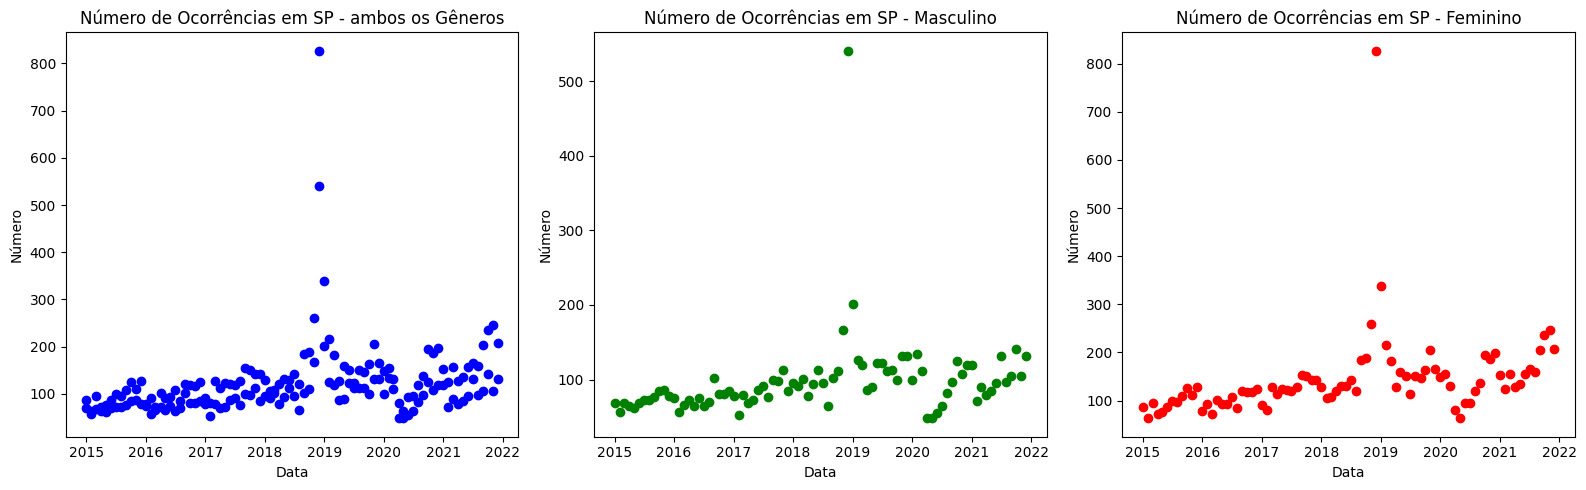

In [378]:
# Criar 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

# Gráfico para df_sp
ax[0].scatter(df_sp['data'], df_sp['numero'], color='blue')
ax[0].set_title('Número de Ocorrências em SP - ambos os Gêneros')
ax[0].set_xlabel('Data')
ax[0].set_ylabel('Número')

# Gráfico para df_sp_masc
ax[1].scatter(df_sp_masc['data'], df_sp_masc['numero'], color='green')
ax[1].set_title('Número de Ocorrências em SP - Masculino')
ax[1].set_xlabel('Data')
ax[1].set_ylabel('Número')

# Gráfico para df_sp_fem
ax[2].scatter(df_sp_fem['data'], df_sp_fem['numero'], color='red')
ax[2].set_title('Número de Ocorrências em SP - Feminino')
ax[2].set_xlabel('Data')
ax[2].set_ylabel('Número')

plt.tight_layout()
plt.show()

##### Próximo passo é fazer uma regressão linear para os 3 cohorts acima (Estado de SP - por ambos os gêneros juntos, separado masculino e separado feminino).
##### Como o cliente solicitou a previsão do número total de casamentos homoafetivos, podemos fazer a análise somente do cohort de SP e para ambos os gêneros.
##### Irei fazer a previsão mais completa do Estado de SP - considerando os 3 cohorts e para MG e RJ farei considerando somente o ambos os gêneros, pois o cliente quer o número total de casamentos.
##### Neste caso de SP podemos ver se há uma diferença entre os números de casamentos previstos quando consideramos os 3 cohorts, neste caso podemos fazer a previsão para a seguinte situação:
##### **1) Estado de SP - Para ambos os gêneros**
##### **2) Estado de SP - Para o gênero Masculino**
##### **3) Estado de SP - Para o gênero Feminino**
##### Assim podemos constatar se o número de previsões no cohort **1)** é semelhante ao número de previsões na soma dos cohorts **2)** e **3)**.

##### Antes de fazermos a **Regressão Linear** devemos retirar os Outliers, porém irei fazer a **Regressão Linear** sem tirar os Outliers (DataFrame de SP).
##### A ideia é ver se há diferenças significativas no R² da Regressão Linear do modelo com e sem Outliers (posso adiantar de antemão que há diferenças).

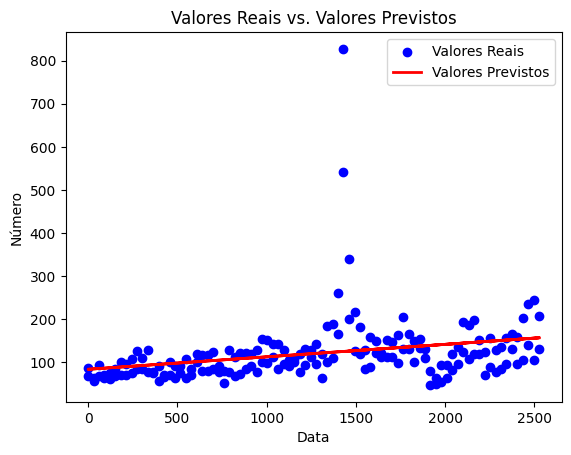

                            OLS Regression Results                            
Dep. Variable:                 numero   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     13.63
Date:                Tue, 21 May 2024   Prob (F-statistic):           0.000302
Time:                        21:47:19   Log-Likelihood:                -962.50
No. Observations:                 168   AIC:                             1929.
Df Residuals:                     166   BIC:                             1935.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            84.2473     11.451      7.357

In [379]:
# Regressão Linear para o DataFrame de SP (df_sp) - Sem retirar Outliers (Mudança drástica no R² - reparar mais abaixo a diferença):
x = df_sp['data_numerica'] # a Biblioteca statsmodel não suporta o formato de Datetime, então neste caso devemos usar a data_num
# data_num é a coluna referente aos dias corridos ao longo dos anos que é a data atual menos a primeira data do DataFrame. (retomando conceito)
y = df_sp['numero']

x = sm.add_constant(x)
modelo = sm.OLS(y, x).fit()
y_pred = modelo.predict()

plt.scatter(df_sp['data_numerica'], df_sp['numero'], label='Valores Reais', color='blue')
plt.plot(df_sp['data_numerica'], y_pred, label='Valores Previstos', color='red', linewidth=2)

plt.xlabel('Data')
plt.ylabel('Número')
plt.title('Valores Reais vs. Valores Previstos')
plt.legend()
plt.show()

print(modelo.summary())

##### Agora o próximo passo é remover os Ouliers com o método de Tukey
##### Fonte: https://medium.com/@lucapqg/como-detectar-e-tratar-outliers-com-python-ca2cf088c160

##### Retirada dos Outliers para DataFrame do Estado de SP e Ambos os Gêneros (abaixo):

In [380]:
#Retirar os Outliers com o Método de Tukey - Retirar Outliers para df_sp:

# Calcular Q1 (25º percentil) e Q3 (75º percentil)
Q1 = df_sp['numero'].quantile(0.25)
Q3 = df_sp['numero'].quantile(0.75)

# Calcular IQR (Interquartile Range)
IQR = Q3 - Q1

# Definir os limites inferior e superior
inferior = Q1 - (1.5 * IQR)
superior = Q3 + (1.5 * IQR)
outliers = df_sp[(df_sp['numero'] < inferior) | (df_sp['numero'] > superior)] # Tira os dados que são menores que os limites inferiores OU maiores que os superiores

#Remoção dos Outliers
df_sp = df_sp[~((df_sp['numero'] < inferior) | (df_sp['numero'] > superior))]

##### Regressão Linear para SP - Ambos os Gêneros

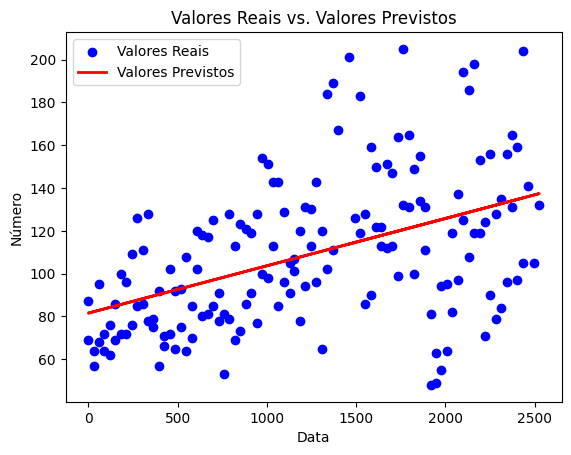

                            OLS Regression Results                            
Dep. Variable:                 numero   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     43.22
Date:                Tue, 21 May 2024   Prob (F-statistic):           6.78e-10
Time:                        21:47:20   Log-Likelihood:                -777.03
No. Observations:                 160   AIC:                             1558.
Df Residuals:                     158   BIC:                             1564.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            81.5538      4.831     16.880

In [381]:
# Regressão Linear para o DataFrame de SP (df_sp) com Outliers removidos:
x = df_sp['data_numerica'] # a Biblioteca statsmodel não suporta o formato de Datetime, então neste caso devemos usar a data_num
# data_num é a coluna referente aos dias corridos ao longo dos anos que é a data atual menos a primeira data do DataFrame. (retomando conceito)
y = df_sp['numero']

x = sm.add_constant(x)
modelo = sm.OLS(y, x).fit()
y_pred = modelo.predict()

plt.scatter(df_sp['data_numerica'], df_sp['numero'], label='Valores Reais', color='blue')
plt.plot(df_sp['data_numerica'], y_pred, label='Valores Previstos', color='red', linewidth=2)

plt.xlabel('Data')
plt.ylabel('Número')
plt.title('Valores Reais vs. Valores Previstos')
plt.legend()
plt.show()

print(modelo.summary())

# Obter os coeficientes
intercept, slope = modelo.params

# Imprimir a equação da reta
print(f"Equação da reta: y = {intercept:.2f} + {slope:.2f} * x")

##### Podemos notar acima que há uma diferença significativa entre os R² nos modelos com e sem Outliers:
##### R² sem Outlier = 0.076
##### R² com Outlier = 0.215
##### Isso demonstra que não utilizar os Outliers no modelos de Regressão Linear, nos garante uma assertividade melhor do ajuste da reta.
##### Acima temos um print da equação que descreve a reta que melhor austa nos dados, isso será importante para prever o número de casamentos nos próximos 2 anos.
##### Neste caso a Eq. da Reta é:  **y = 81.55 + 0.02 * x**

##### Abaixo seguem as Regressões Lineares do Estado de SP - Para casamentos Masculinos e Femininos

##### Retirada dos Outliers para DataFrame do Estado de SP e Gênero Masculino (abaixo):

In [382]:
#Retirar os Outliers com o Método de Tukey - Retirar Outliers para df_sp_masc - DataFrame para SP - Masculino:

# Calcular Q1 (25º percentil) e Q3 (75º percentil)
Q1 = df_sp_masc['numero'].quantile(0.25)
Q3 = df_sp_masc['numero'].quantile(0.75)

# Calcular IQR (Interquartile Range)
IQR = Q3 - Q1

# Definir os limites inferior e superior
inferior = Q1 - (1.5 * IQR)
superior = Q3 + (1.5 * IQR)
outliers = df_sp_masc[(df_sp_masc['numero'] < inferior) | (df_sp_masc['numero'] > superior)] # Tira os dados que são menores que os limites inferiores OU maiores que os superiores

#Remoção dos Outliers
df_sp_masc = df_sp_masc[~((df_sp_masc['numero'] < inferior) | (df_sp_masc['numero'] > superior))]

##### Regressão Linear para SP - Masculino

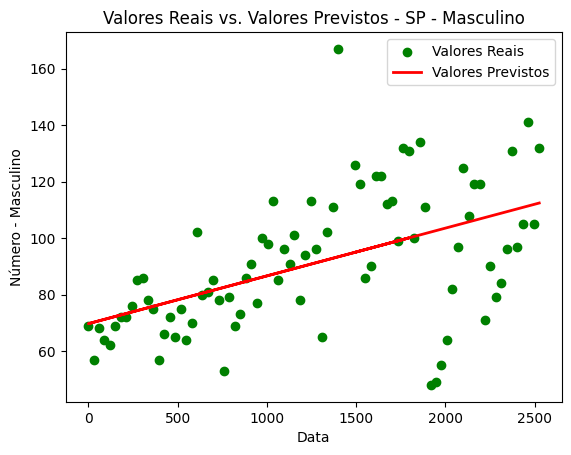

                            OLS Regression Results                            
Dep. Variable:                 numero   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     30.26
Date:                Tue, 21 May 2024   Prob (F-statistic):           4.40e-07
Time:                        21:47:21   Log-Likelihood:                -364.16
No. Observations:                  82   AIC:                             732.3
Df Residuals:                      80   BIC:                             737.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            69.6908      4.499     15.490

In [383]:
# Regressão Linear para o DataFrame de SP - Masculino:
# Devemos Criar a coluna de data númerica de dias corridos para este DataFrame, pois ainda não possui:
df_sp_masc['data_numerica'] = (df_sp_masc['data'] - pd.Timestamp(min(df_sp_masc['data']))).dt.days

x = df_sp_masc['data_numerica'] # a Biblioteca statsmodel não suporta o formato de Datetime, então neste caso devemos usar a data_num
# data_num é a coluna referente aos dias corridos ao longo dos anos que é a data atual menos a primeira data do DataFrame. (retomando conceito)
y = df_sp_masc['numero']

x = sm.add_constant(x)
modelo = sm.OLS(y, x).fit()
y_pred = modelo.predict()

plt.scatter(df_sp_masc['data_numerica'], df_sp_masc['numero'], label='Valores Reais', color='green')
plt.plot(df_sp_masc['data_numerica'], y_pred, label='Valores Previstos', color='red', linewidth=2)

plt.xlabel('Data')
plt.ylabel('Número - Masculino')
plt.title('Valores Reais vs. Valores Previstos - SP - Masculino')
plt.legend()
plt.show()

print(modelo.summary())

# Obter os coeficientes
intercept, slope = modelo.params

# Imprimir a equação da reta
print(f"Equação da reta: y = {intercept:.2f} + {slope:.2f} * x")

##### Retirada dos Outliers para DataFrame do Estado de SP e Gênero Feminino (abaixo):

In [384]:
#Retirar os Outliers com o Método de Tukey - Retirar Outliers para df_sp_fem - DataFrame para SP - Feminino:

# Calcular Q1 (25º percentil) e Q3 (75º percentil)
Q1 = df_sp_fem['numero'].quantile(0.25)
Q3 = df_sp_fem['numero'].quantile(0.75)

# Calcular IQR (Interquartile Range)
IQR = Q3 - Q1

# Definir os limites inferior e superior
inferior = Q1 - (1.5 * IQR)
superior = Q3 + (1.5 * IQR)
outliers = df_sp_fem[(df_sp_fem['numero'] < inferior) | (df_sp_fem['numero'] > superior)] # Tira os dados que são menores que os limites inferiores OU maiores que os superiores

#Remoção dos Outliers
df_sp_fem = df_sp_fem[~((df_sp_fem['numero'] < inferior) | (df_sp_fem['numero'] > superior))]

##### Regressão Linear para SP - Feminino

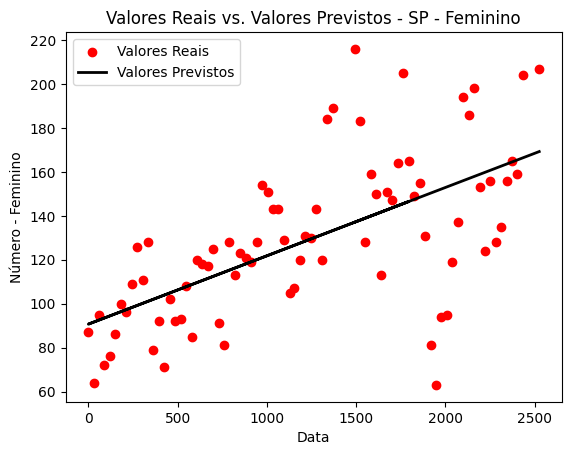

                            OLS Regression Results                            
Dep. Variable:                 numero   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     50.15
Date:                Tue, 21 May 2024   Prob (F-statistic):           5.82e-10
Time:                        21:47:21   Log-Likelihood:                -376.21
No. Observations:                  79   AIC:                             756.4
Df Residuals:                      77   BIC:                             761.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.6736      6.276     14.447      0.0

In [385]:
# Regressão Linear para o DataFrame de SP - Feminino:
# Devemos Criar a coluna de data númerica de dias corridos para este DataFrame, pois ainda não possui:
df_sp_fem['data_num'] = (df_sp_fem['data'] - pd.Timestamp(min(df_sp_fem['data']))).dt.days

x = df_sp_fem['data_num'] # a Biblioteca statsmodel não suporta o formato de Datetime, então neste caso devemos usar a data_num
# data_num é a coluna referente aos dias corridos ao longo dos anos que é a data atual menos a primeira data do DataFrame. (retomando conceito)
y = df_sp_fem['numero']

x = sm.add_constant(x)
modelo = sm.OLS(y, x).fit()
y_pred = modelo.predict()

plt.scatter(df_sp_fem['data_num'], df_sp_fem['numero'], label='Valores Reais', color='red')
plt.plot(df_sp_fem['data_num'], y_pred, label='Valores Previstos', color='black', linewidth=2)

plt.xlabel('Data')
plt.ylabel('Número - Feminino')
plt.title('Valores Reais vs. Valores Previstos - SP - Feminino')
plt.legend()
plt.show()

print(modelo.summary())

# Obter os coeficientes
intercept, slope = modelo.params

# Imprimir a equação da reta
print(f"Equação da reta: y = {intercept:.2f} + {slope:.2f} * x")